# NinjaCart CNN Case Study

Gautam Naik (gautamnaik1994@gmail.com)

Github Link: https://github.com/gautamnaik1994/Fruit_Classification_CNN_Pytorch

**About NinjaCart**  

NinjaCart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology

**Problem Statement**

The biggest challenge Ninjacart faces is to supply fresh products from the farmers to the businesses within 12 hours. They need to ensure that the correct vegetables are selected for delivery


**Solution**

By using a Convolution Neural Network (CNN) model, we can classify the vegetables and fruits based on their images. This will help in automating the process of sorting and selecting the correct products for delivery.. The model will be trained on a dataset of images of different fruits and vegetables, and it will learn to identify the different classes based on the features in the images.

**Metrics**

Accuracy will be used as the primary metric to evaluate the performance of the model. The model will be trained on a training set and evaluated on a validation set. The accuracy will be calculated as the number of correct predictions divided by the total number of predictions.


**Dataset**

This dataset contains a folder train, which has a total of 3135 images, split into four folders as follows:  
- Tomato : 789
- Potato : 898
- Onion : 849
- Indian market : 599  

This dataset contains another folder test which has a total of 351 images, split into four folders  
- Tomato : 106
- potato : 83
- onion : 81
- Indian market : 81


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import seaborn as sns
# sns.set_theme(style="whitegrid")

In [2]:
raw_path_train="../data/raw/ninjacart_data/train"
raw_path_test="../data/raw/ninjacart_data/test"

In [3]:
train_onions = glob.glob(raw_path_train + "/onion/*.*")
train_potatoes = glob.glob(raw_path_train + "/potato/*.*")
train_tomatoes = glob.glob(raw_path_train + "/tomato/*.*")
train_indian_market=glob.glob(raw_path_train + "/indian_market/*.*")

test_onions = glob.glob(raw_path_test + "/onion/*.*")
test_potatoes = glob.glob(raw_path_test + "/potato/*.*")
test_tomatoes = glob.glob(raw_path_test + "/tomato/*.*")
test_indian_market=glob.glob(raw_path_test + "/indian_market/*.*")

In [4]:
print("Train tomatoes: ", len(train_tomatoes))
print("Train potatoes: ", len(train_potatoes))
print("Train onions: ", len(train_onions))
print("Train indian market: ", len(train_indian_market))
print("------------------")
print("Test tomatoes: ", len(test_tomatoes))
print("Test potatoes: ", len(test_potatoes))
print("Test onions: ", len(test_onions))
print("Test indian market: ", len(test_indian_market))

Train tomatoes:  789
Train potatoes:  898
Train onions:  849
Train indian market:  599
------------------
Test tomatoes:  106
Test potatoes:  81
Test onions:  83
Test indian market:  81


<class 'numpy.ndarray'>
(276, 183, 3)


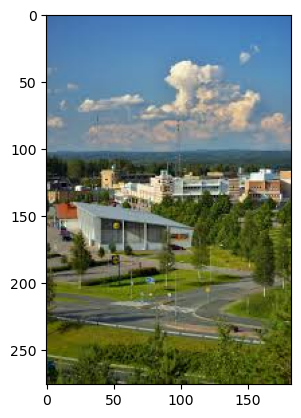

In [5]:
img = plt.imread(train_indian_market[1])
plt.imshow(img)
print(type(img))
print(img.shape)

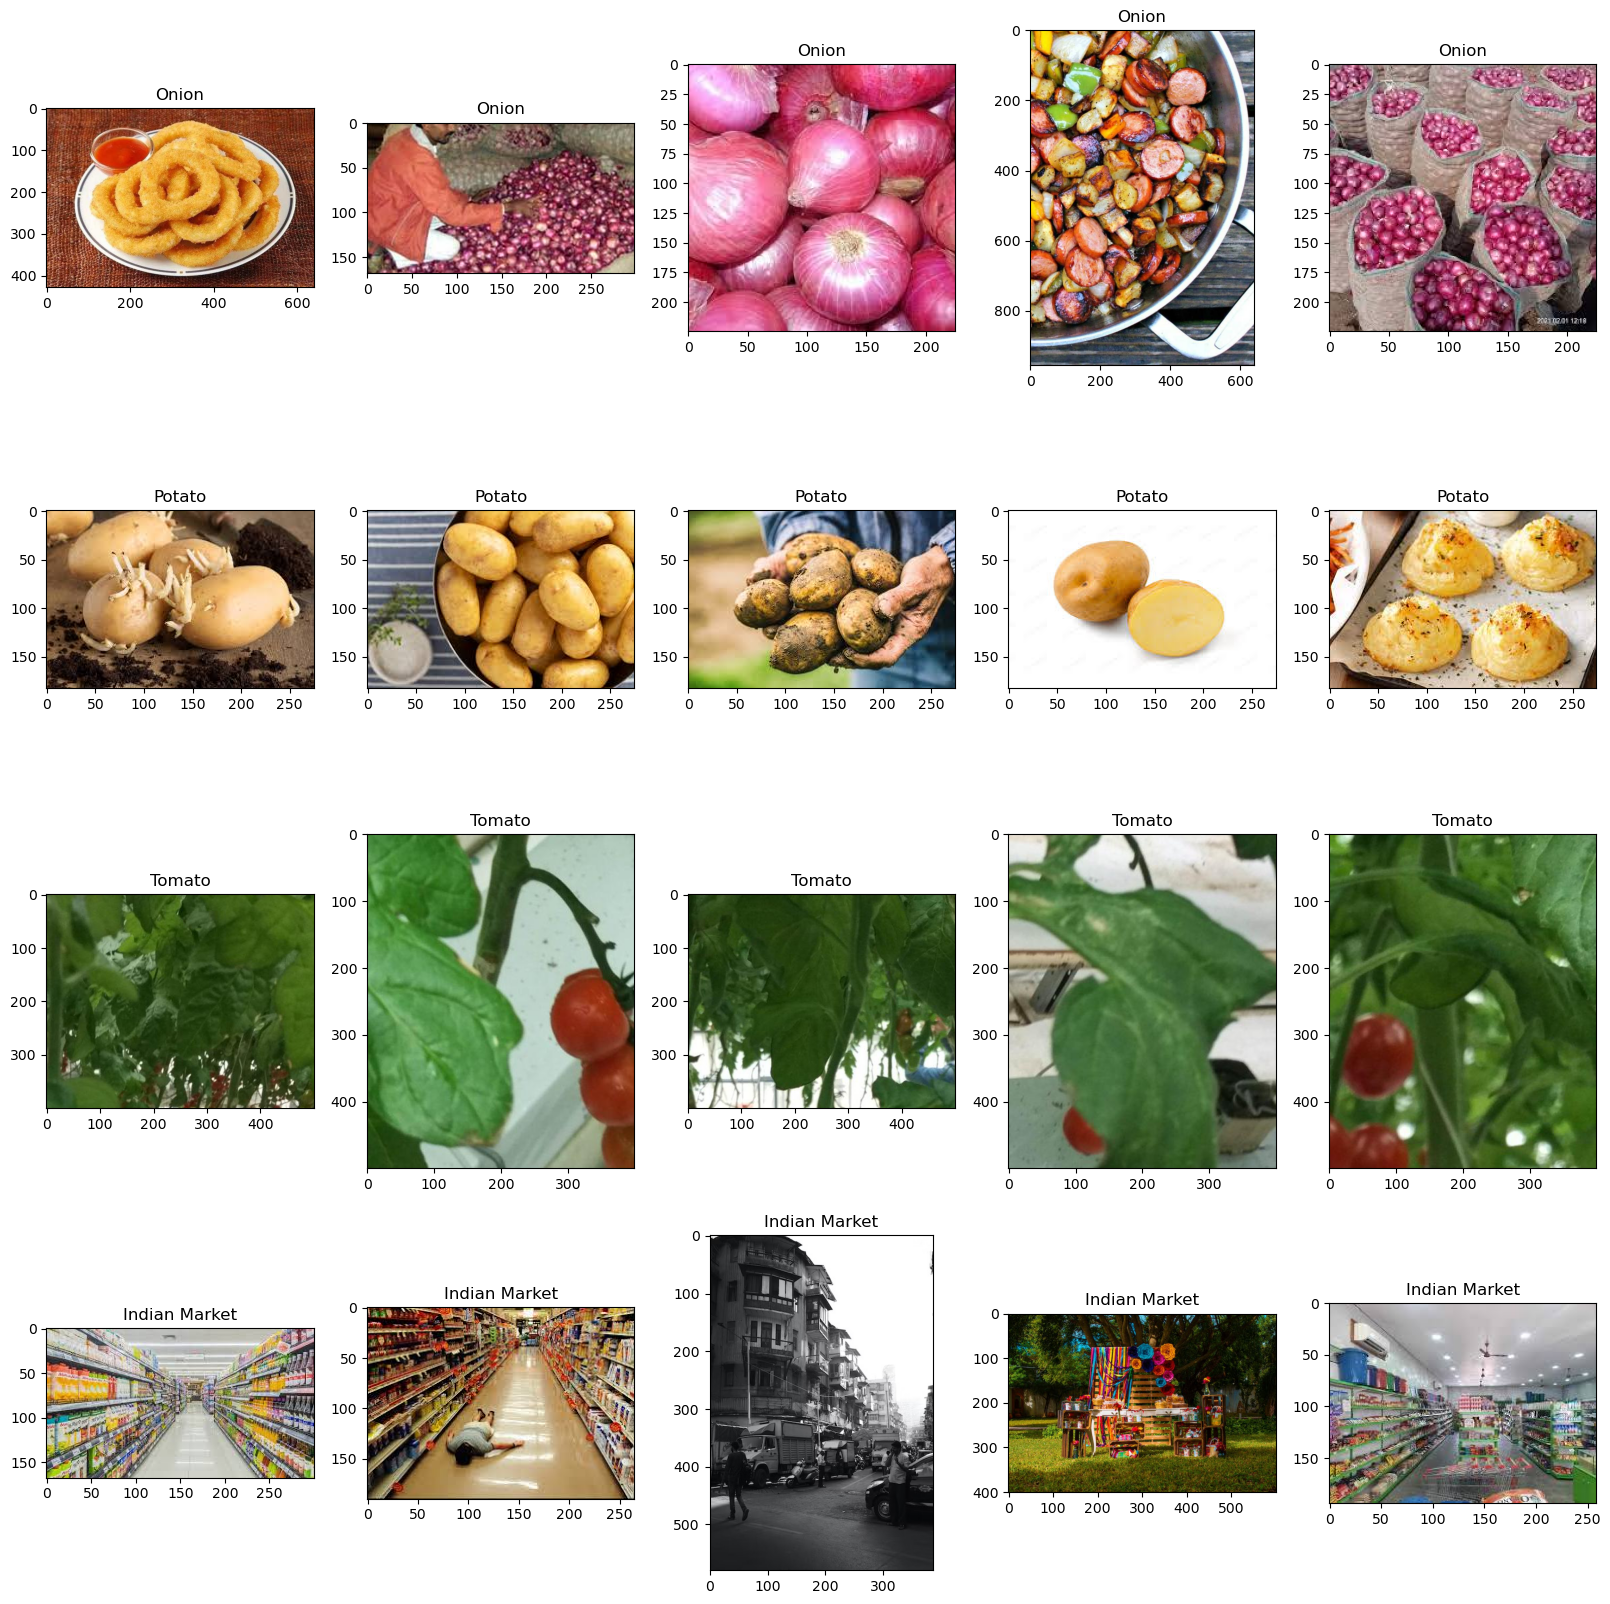

In [6]:
fig,ax=plt.subplots(4,5,figsize=(20,20))
for i in range(4):
    for j in range(5):
        if i == 0:
            img = plt.imread(train_onions[i*5+j])
            ax[i,j].imshow(img)
            ax[i,j].set_title("Onion")
        elif i == 1:
            img = plt.imread(train_potatoes[i*5+j])
            ax[i,j].imshow(img)
            ax[i,j].set_title("Potato")
        elif i == 2:
            img = plt.imread(train_tomatoes[i*5+j])
            ax[i,j].imshow(img)
            ax[i,j].set_title("Tomato")
        elif i == 3:
            img = plt.imread(train_indian_market[i*5+j])
            ax[i,j].imshow(img)
            ax[i,j].set_title("Indian Market")

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Above plot shows the different category of images

In [ ]:
images=[]
for pth in train_indian_market+train_onions+train_potatoes+train_tomatoes +test_indian_market+test_onions+test_potatoes+test_tomatoes:
    img = plt.imread(pth)
    images.append({
        "width": img.shape[1],
        "height": img.shape[0],
        "label": pth.split("/")[-2],
        "type": pth.split("/")[-3]
    })

In [8]:
df=pd.DataFrame(data=images)

In [14]:
df.tail()

,width,height,label,type
3481,400,500,tomato,test
3482,500,400,tomato,test
3483,400,500,tomato,test
3484,400,500,tomato,test
3485,500,400,tomato,test


In [16]:
df.describe()

,width,height
count,3486.000000,3486.000000
mean,385.092656,329.075731
std,235.595630,227.564573
min,48.000000,48.000000
25%,267.000000,183.000000
50%,300.000000,225.000000
75%,500.000000,480.000000
max,6030.000000,4256.000000


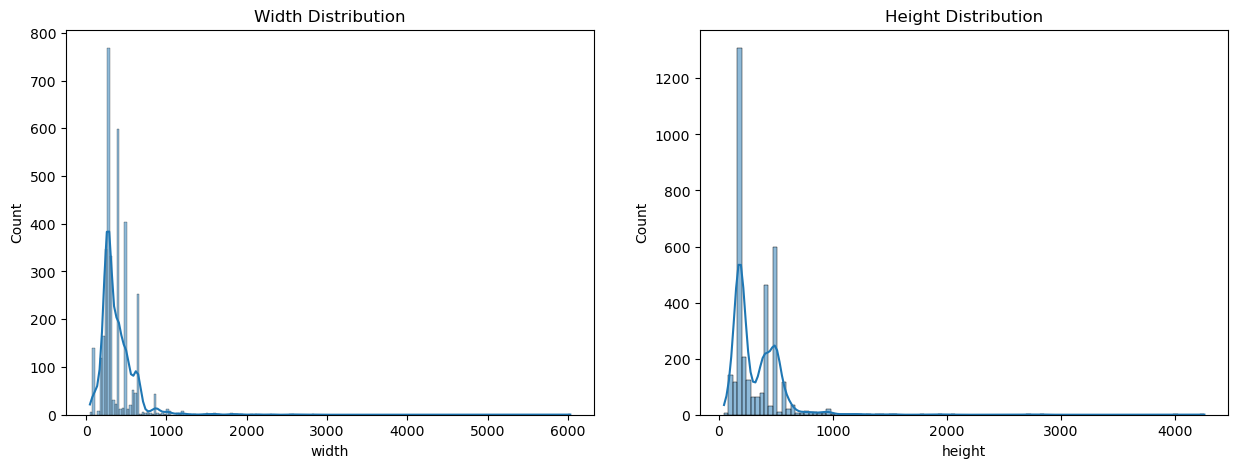

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df, x="width", kde=True, ax=ax[0]);
ax[0].set_title('Width Distribution')
sns.histplot(df, x="height", kde=True, ax=ax[1]);
ax[1].set_title('Height Distribution');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- From above plot we can see that most of the images are around 300x300 pixels.
- Majority of the images are under 1000x1000 pixels.

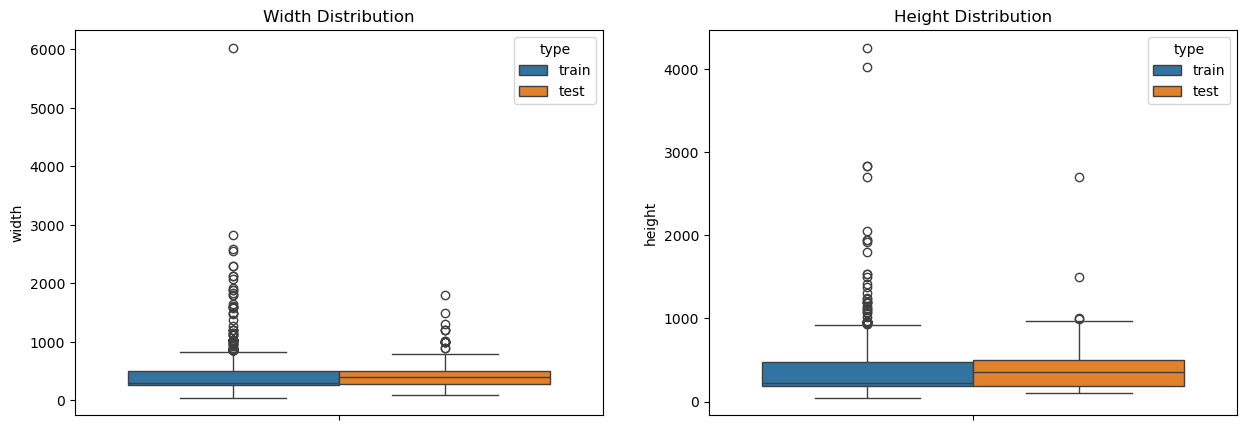

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(df, y="width", ax=ax[0], hue="type");
ax[0].set_title('Width Distribution')
sns.boxplot(df, y="height", ax=ax[1], hue="type");
ax[1].set_title('Height Distribution');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- From above plot we can see that most of the images are around 300x300 pixels.
- Majority of the images are under 1000x1000 pixels.

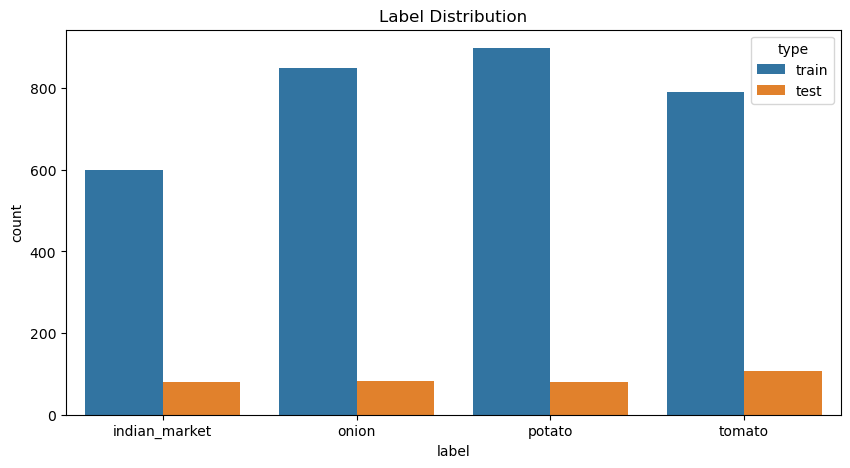

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="label", hue="type");
plt.title('Label Distribution');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- From above plot we can see that potato has the highest number of images
- There does not seem to be any class imbalance in the dataset